# Preprocessing phase

## 1.Tokenizing the text

This is the first part of the preprocessing. The main goal is to split the text into tokens, which is a required step for creating embeddings in LLM. 

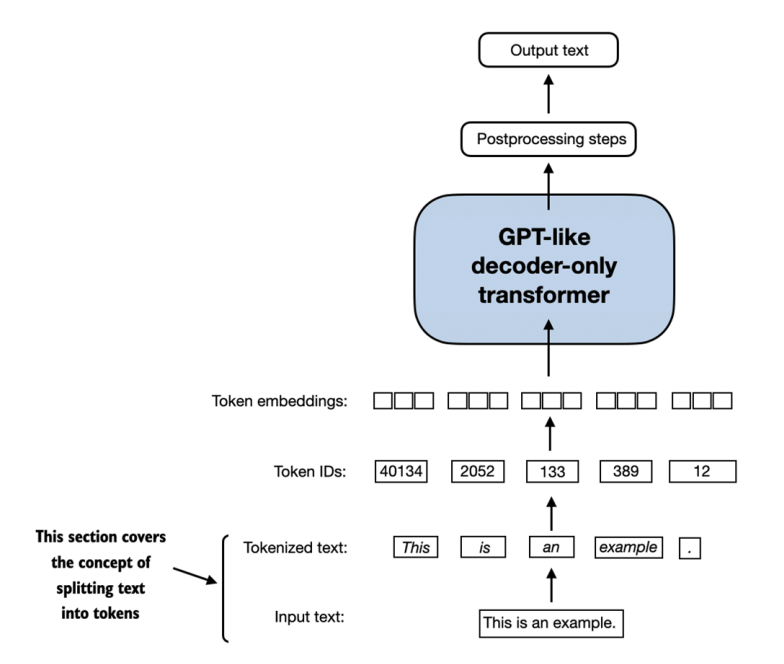

In [4]:
# opening the file and storing 'The verdict' book in a variable
with open('text.txt' , 'r' , encoding="utf-8") as f:
    raw_text = f.read()

print('Total number of character:', len(raw_text))
print(raw_text[:99])

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [10]:
# This is a simple tokenizer, we  use is to extract all the punctuations and words without whitespaces
import re
tokenized_data = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
tokenized_data = [item.strip() for item in tokenized_data if item.strip()]
print(len(tokenized_data))


4690


In [11]:
print(tokenized_data[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


## 2. Converting tokens into token IDs

In the first part, we took the raw_text into a list of tokens. Now in this part, we take this list and turn each token into token IDs. This is the intermediate step from taking the token IDs into embedding vectors. In this stage, we create a vocabulary including all the tokens in our dataset. In this  dictionary each token is the key and it is linked to a number. 

In [13]:
all_words = sorted(set(tokenized_data))
vocab_size = len(all_words)
vocab_size

1130

In [16]:
vocab = {token:integer for integer,token in enumerate(all_words)}
vocab

{'!': 0,
 '"': 1,
 "'": 2,
 '(': 3,
 ')': 4,
 ',': 5,
 '--': 6,
 '.': 7,
 ':': 8,
 ';': 9,
 '?': 10,
 'A': 11,
 'Ah': 12,
 'Among': 13,
 'And': 14,
 'Are': 15,
 'Arrt': 16,
 'As': 17,
 'At': 18,
 'Be': 19,
 'Begin': 20,
 'Burlington': 21,
 'But': 22,
 'By': 23,
 'Carlo': 24,
 'Chicago': 25,
 'Claude': 26,
 'Come': 27,
 'Croft': 28,
 'Destroyed': 29,
 'Devonshire': 30,
 'Don': 31,
 'Dubarry': 32,
 'Emperors': 33,
 'Florence': 34,
 'For': 35,
 'Gallery': 36,
 'Gideon': 37,
 'Gisburn': 38,
 'Gisburns': 39,
 'Grafton': 40,
 'Greek': 41,
 'Grindle': 42,
 'Grindles': 43,
 'HAD': 44,
 'Had': 45,
 'Hang': 46,
 'Has': 47,
 'He': 48,
 'Her': 49,
 'Hermia': 50,
 'His': 51,
 'How': 52,
 'I': 53,
 'If': 54,
 'In': 55,
 'It': 56,
 'Jack': 57,
 'Jove': 58,
 'Just': 59,
 'Lord': 60,
 'Made': 61,
 'Miss': 62,
 'Money': 63,
 'Monte': 64,
 'Moon-dancers': 65,
 'Mr': 66,
 'Mrs': 67,
 'My': 68,
 'Never': 69,
 'No': 70,
 'Now': 71,
 'Nutley': 72,
 'Of': 73,
 'Oh': 74,
 'On': 75,
 'Once': 76,
 'Only': 77,
 '

In [17]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab #A
        self.int_to_str = {i:s for s,i in vocab.items()} #B
    def encode(self, text): #C
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
    def decode(self, ids): #D
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text) #E
        return text

In [21]:
tokenizer = SimpleTokenizerV1()
tokenizer.encode(raw_text)

TypeError: SimpleTokenizerV1.__init__() missing 1 required positional argument: 'vocab'